<a href="https://colab.research.google.com/github/Motilipz/PW_Skills/blob/main/Boosting_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Boosting Techniques | Assignment
Theoretical Questions: Question 6 to Question 9


Datasets:
- `Use sklearn.datasets.load_breast_cancer()` for classification tasks.
- `Use sklearn.datasets.fetch_california_housing()` for regression tasks.

**Question 6:** Write a Python program to:
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9649


**Question 7:** Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.7756


**Question 8:** Write a Python program to:
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy with Best Model: {accuracy:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'learning_rate': 0.1}
Best Cross-validation Accuracy: 0.9626
Test Set Accuracy with Best Model: 0.9561


**Question 9:** Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn


CatBoost Classifier Accuracy: 0.9737


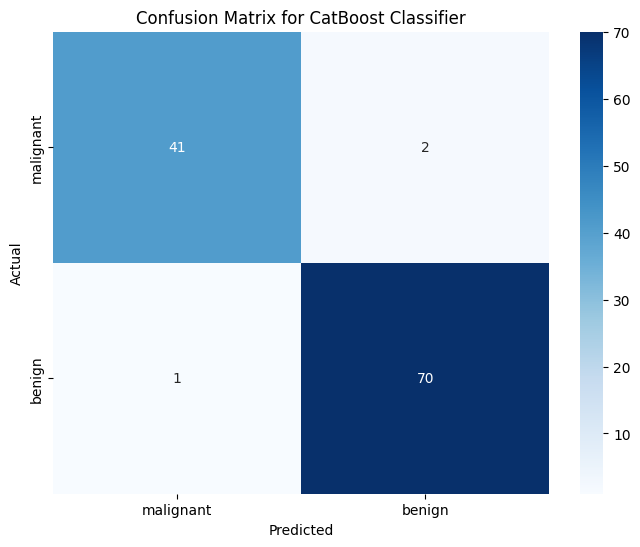

In [24]:
# !pip install catboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cat_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()